In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plot
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer, scale
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as  np

In [3]:
train = pd.read_csv('WomenSafteyTrain.csv')
train

,Cities,Nearest Police Station,Helpline Number,District,Camera Survelliance,Crime Rate,Visibility,Crowd,Public Transport,Distance To PCR,Unsafe
0,Shakar Pur Baramad,Preet Vihar,2210291,East,NO,34.532,3.00,1178,14.23,13.345,0
1,Chilla Saroda Khadar,Vivek Vihar,2146040,East,NO,38.912,6.21,11743,25.93,2.123,1
2,Gharonda Neemka Bangar,Gandhi Nagar,2212761,East,NO,40.982,9.26,37876,57.23,12.563,0
3,Kondli,Preet Vihar,2210291,East,YES,32.891,9.45,38207,56.85,12.123,0
4,Chilla Saroda Bangar,Vivek Vihar,2146040,East,NO,36.707,11.62,83217,68.89,3.567,0
5,Gharoli,Gandhi Nagar,2212761,East,NO,39.002,11.69,92540,70.03,2.645,0
6,Dallo Pura,Gandhi Nagar,2212761,East,YES,38.979,11.80,154791,73.92,3.234,1
7,Jharoda Majra Burari,Civil Lines,2522233,North,YES,32.232,8.24,22878,52.95,5.234,1
8,Kamal Pur Majra Burari,Sadar Bazar,529792,North,NO,34.212,9.89,43086,54.95,4.223,1
9,Mukand Pur,Sadar Bazar,529792,North,YES,33.312,11.39,57135,60.94,12.345,1


In [4]:
train.head()

,Cities,Nearest Police Station,Helpline Number,District,Camera Survelliance,Crime Rate,Visibility,Crowd,Public Transport,Distance To PCR,Unsafe
0,Shakar Pur Baramad,Preet Vihar,2210291,East,NO,34.532,3.00,1178,14.23,13.345,0
1,Chilla Saroda Khadar,Vivek Vihar,2146040,East,NO,38.912,6.21,11743,25.93,2.123,1
2,Gharonda Neemka Bangar,Gandhi Nagar,2212761,East,NO,40.982,9.26,37876,57.23,12.563,0
3,Kondli,Preet Vihar,2210291,East,YES,32.891,9.45,38207,56.85,12.123,0
4,Chilla Saroda Bangar,Vivek Vihar,2146040,East,NO,36.707,11.62,83217,68.89,3.567,0


In [5]:
#length of databases
print(len(train))

95


In [6]:
train.describe()

,Helpline Number,Crime Rate,Visibility,Crowd,Public Transport,Distance To PCR,Unsafe
count,9.500000e+01,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,5.533102e+06,44.795842,8.032737,41344.210526,44.637684,6.032295,0.357895
std,2.098085e+06,8.956359,2.660726,51745.897601,19.097373,3.366915,0.481924
min,5.297920e+05,30.098000,3.000000,1178.000000,14.230000,1.001000,0.000000
25%,4.155322e+06,37.893500,6.120000,10882.500000,25.250000,3.556000,0.000000
50%,6.429617e+06,42.091000,7.560000,19148.000000,45.970000,5.345000,0.000000
75%,7.210564e+06,55.173500,11.005000,51604.000000,59.455000,8.450500,1.000000
max,7.282804e+06,59.364000,12.020000,283211.000000,79.820000,15.973000,1.000000


In [7]:
train = train.drop(['Helpline Number','Cities','Nearest Police Station'], axis = 1)
train

,District,Camera Survelliance,Crime Rate,Visibility,Crowd,Public Transport,Distance To PCR,Unsafe
0,East,NO,34.532,3.00,1178,14.23,13.345,0
1,East,NO,38.912,6.21,11743,25.93,2.123,1
2,East,NO,40.982,9.26,37876,57.23,12.563,0
3,East,YES,32.891,9.45,38207,56.85,12.123,0
4,East,NO,36.707,11.62,83217,68.89,3.567,0
5,East,NO,39.002,11.69,92540,70.03,2.645,0
6,East,YES,38.979,11.80,154791,73.92,3.234,1
7,North,YES,32.232,8.24,22878,52.95,5.234,1
8,North,NO,34.212,9.89,43086,54.95,4.223,1
9,North,YES,33.312,11.39,57135,60.94,12.345,1


In [8]:
#camera survellience
# YES --> 1
# NO --> 0

def getCameraSurvellience(str):
    if str == "YES":
        return 1
    elif str == "NO":
        return 0
    
train['Camera Survelliance'] = train['Camera Survelliance'].apply(getCameraSurvellience)
print(train['Camera Survelliance'])

0     0
1     0
2     0
3     1
4     0
5     0
6     1
7     1
8     0
9     1
10    1
11    0
12    1
13    0
14    1
15    0
16    0
17    0
18    1
19    1
20    0
21    1
22    0
23    0
24    0
25    0
26    1
27    0
28    1
29    1
     ..
65    1
66    1
67    0
68    0
69    1
70    0
71    0
72    1
73    1
74    0
75    0
76    0
77    0
78    0
79    1
80    1
81    0
82    1
83    0
84    0
85    1
86    0
87    0
88    1
89    0
90    0
91    1
92    1
93    1
94    0
Name: Camera Survelliance, Length: 95, dtype: int64


In [9]:
#district to numbers -->> 
# east - 1
# north -2
# north west - 3
# south - 4
# south west - 5
# west - 6

def getDistrictNumbers(str):
    if str == "East":
        return 1
    elif str == "North":
        return 2
    elif str == "North West":
        return 3
    elif str == "South":
        return 4
    elif str == "South West":
        return 5
    elif str == "West":
        return 6
    
train['District'] = train['District'].apply(getDistrictNumbers)
print(train['District'])

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     2
9     2
10    2
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    3
29    3
     ..
65    4
66    4
67    5
68    5
69    5
70    5
71    5
72    5
73    5
74    5
75    5
76    5
77    5
78    5
79    5
80    5
81    5
82    5
83    5
84    6
85    6
86    6
87    6
88    6
89    6
90    6
91    6
92    6
93    6
94    6
Name: District, Length: 95, dtype: int64


In [10]:
train.tail()

,District,Camera Survelliance,Crime Rate,Visibility,Crowd,Public Transport,Distance To PCR,Unsafe
90,6,0,34.561,10.13,43371,56.04,4.987,0
91,6,1,36.707,11.52,52744,56.93,4.869,1
92,6,1,32.231,11.27,54541,60.22,3.467,0
93,6,1,38.011,11.89,176877,75.23,6.345,0
94,6,0,33.372,12.00,205596,78.72,3.786,0


In [11]:
train_data = pd.DataFrame(train.dtypes)
train_data

,0
District,int64
Camera Survelliance,int64
Crime Rate,float64
Visibility,float64
Crowd,int64
Public Transport,float64
Distance To PCR,float64
Unsafe,int64


In [12]:
print("Safe Places")
print(train[train.Unsafe == 1].describe())
print()
print("UnSafe Places")
print(train[train.Unsafe == 0].describe())

Safe Places
        District  Camera Survelliance  Crime Rate  Visibility           Crowd  \
count  34.000000            34.000000   34.000000    34.000000      34.000000   
mean    3.529412             0.470588   44.825500     7.909412   40701.529412   
std     1.236694             0.506640    9.503374     2.821499   49257.927877   
min     1.000000             0.000000   30.098000     3.230000    4074.000000   
25%     3.000000             0.000000   36.777000     6.132500   10768.250000   
50%     3.500000             0.000000   43.713000     7.665000   19221.000000   
75%     4.000000             1.000000   55.131750    10.980000   51252.000000   
max     6.000000             1.000000   59.234000    11.920000  181554.000000   

       Public Transport  Distance To PCR  Unsafe  
count         34.000000        34.000000    34.0  
mean          43.931765         6.636235     1.0  
std           19.643923         3.600116     0.0  
min           17.450000         1.223000     1.0  
25%

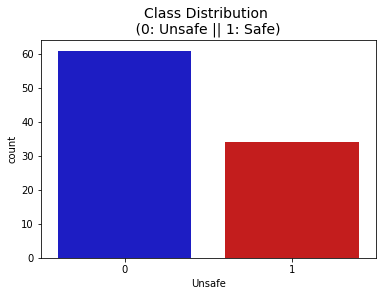

In [13]:
colors = ["#0101DF", "#DF0101"]

#comparison of safe and unsafe

sns.countplot('Unsafe', data = train, palette = colors)
plt.title('Class Distribution \n (0: Unsafe || 1: Safe) ', fontsize = 14)
plt.show()

In [14]:
print("District East")
print(train.Unsafe[train.District == 1].describe())
print()
print("District North")
print(train.Unsafe[train.District == 2].describe())
print()
print("District North West")
print(train.Unsafe[train.District == 3].describe())
print()
print("District South")
print(train.Unsafe[train.District == 4].describe())
print()
print("District South West")
print(train.Unsafe[train.District == 5].describe())
print()
print("District West")
print(train.Unsafe[train.District == 6].describe())
print()

District East
count    7.000000
mean     0.285714
std      0.487950
min      0.000000
25%      0.000000
50%      0.000000
75%      0.500000
max      1.000000
Name: Unsafe, dtype: float64

District North
count    4.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: Unsafe, dtype: float64

District North West
count    33.000000
mean      0.333333
std       0.478714
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Unsafe, dtype: float64

District South
count    23.000000
mean      0.434783
std       0.506870
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Unsafe, dtype: float64

District South West
count    17.000000
mean      0.294118
std       0.469668
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Unsafe, dtype: float64

District West
count    11.000000
mean      0.181818
std       

In [15]:
district_camera_group = train.groupby(['District', 'Camera Survelliance']).mean()
district_camera_group

Crime Rate  Visibility          Crowd  \
District Camera Survelliance                                          
1        0                     38.027000     8.356000  45310.800000   
         1                     35.935000    10.625000  96499.000000   
2        0                     34.212000     9.890000  43086.000000   
         1                     31.880667    10.463333  75401.000000   
3        0                     40.303000     7.431667  39257.611111   
         1                     38.338200     7.738000  43140.400000   
4        0                     49.658500     7.916667  27975.166667   
         1                     54.677545     8.424545  46377.636364   
5        0                     57.154545     6.740000  20803.090909   
         1                     56.965833     7.630000  25477.666667   
6        0                     36.364833     8.633333  55326.500000   
         1                     35.436000     9.914000  65120.200000   

                              Public Transport  Distance To PCR    Unsafe  
District Camera Survelliance                                               
1        0                           47.262000         6.848600  0.200000  
         1                           65.385000         7.678500  0.500000  
2        0                           54.950000         4.223000  1.000000  
         1                           62.146667         9.271000  1.000000  
3        0                           39.022222         5.199611  0.333333  
         1                           42.966667         7.066400  0.333333  
4        0                           43.121667         5.648250  0.500000  
         1                           47.019091         6.437727  0.363636  
5        0                           38.051818         6.468364  0.363636  
         1                           40.420000         5.425500  0.166667  
6        0                           51.688333         4.439833  0.000000  
         1                           55.864000         4.581000  0.400000

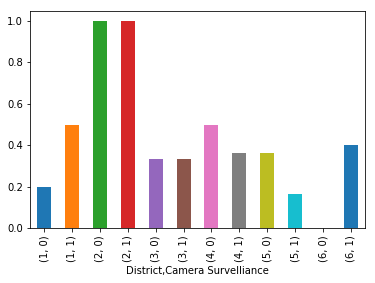

In [16]:
district_camera_group['Unsafe'].plot.bar()

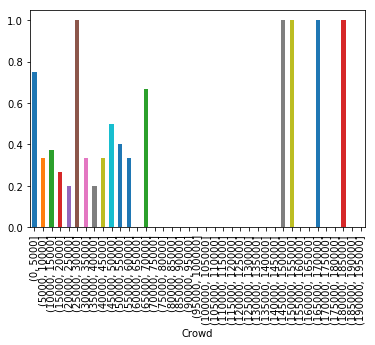

In [17]:
group_by_crowd = pd.cut(train["Crowd"], np.arange(0, 200000, 5000))

crowd_grouping = train.groupby(group_by_crowd).mean()
crowd_grouping['Unsafe'].plot.bar()

In [18]:
Xtrain, Ytrain = np.split(train, [-1], axis =1)

In [19]:
Xtrain

,District,Camera Survelliance,Crime Rate,Visibility,Crowd,Public Transport,Distance To PCR
0,1.0,0.0,34.532,3.00,1178.0,14.23,13.345
1,1.0,0.0,38.912,6.21,11743.0,25.93,2.123
2,1.0,0.0,40.982,9.26,37876.0,57.23,12.563
3,1.0,1.0,32.891,9.45,38207.0,56.85,12.123
4,1.0,0.0,36.707,11.62,83217.0,68.89,3.567
5,1.0,0.0,39.002,11.69,92540.0,70.03,2.645
6,1.0,1.0,38.979,11.80,154791.0,73.92,3.234
7,2.0,1.0,32.232,8.24,22878.0,52.95,5.234
8,2.0,0.0,34.212,9.89,43086.0,54.95,4.223
9,2.0,1.0,33.312,11.39,57135.0,60.94,12.345


In [20]:
Ytrain

,Unsafe
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0
9,1.0


In [21]:
scaler = StandardScaler()
Xtrain['Crowd'] = scaler.fit_transform(Xtrain['Crowd'].values.reshape(-1,1))

In [22]:
#decision tree classifier
clf = DecisionTreeClassifier()

In [23]:
clf.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
testData = pd.read_csv('WomenSafteyTestNew.csv')
testData

,Cities,Nearest Police Station,Helpline Number,Nearest Hospital,Hospital Number,District,Camera Survelliance,Crime Rate,Visibility,Crowd,Public Transport,Distance To PCR
0,Block C,Paschim Vihar Police Station,25263471,Sehgal Neo Hospital,45565656,West,YES,29.03,7.856,945,23.42,4.754
1,B3 Block,Paschim Vihar Police Station,25263471,Sehgal Neo Hospital,45565656,West,YES,28.12,8.433,973,20.75,3.746
2,A1 Block,Paschim Vihar Police Station,25263471,Bhatia Global Hospital,25270702,West,NO,29.86,9.433,984,22.76,4.543
3,Block 12,Paschim Vihar Police Station,25263471,Sehgal Neo Hospital,45565656,West,NO,30.72,6.343,1234,21.64,1.365
4,Block 4,Paschim Vihar Police Station,25263471,Sehgal Neo Hospital,45565656,West,NO,34.86,5.876,1435,24.86,0.465
5,A4 Block,Paschim Vihar Police Station,25263471,Bhatia Global Hospital,25270702,West,NO,39.01,9.543,1454,25.86,0.126
6,Guru Harkishan Nagar,Nihal Vihar Police Station,25946700,Bhatia Global Hospital,25270702,West,NO,35.65,10.435,2354,35.76,3.656
7,B4 Block,Paschim Vihar Police Station,25263471,Sehgal Neo Hospital,45565656,West,YES,36.54,11.546,2356,50.34,2.654
8,State Bank Nagar,Paschim Vihar Police Station,25263471,Sehgal Neo Hospital,45565656,West,YES,32.97,12.001,2435,33.65,1.455
9,B1 Block,Paschim Vihar Police Station,25263471,Sehgal Neo Hospital,45565656,West,YES,34.75,5.345,3356,30.64,1.876


In [44]:
#cleaning the data
print(len(testData))

19


In [54]:
test = testData.drop(['Helpline Number','Cities','Nearest Police Station','Nearest Hospital','Hospital Number'], axis = 1)
test

,District,Camera Survelliance,Crime Rate,Visibility,Crowd,Public Transport,Distance To PCR
0,West,YES,29.03,7.856,945,23.42,4.754
1,West,YES,28.12,8.433,973,20.75,3.746
2,West,NO,29.86,9.433,984,22.76,4.543
3,West,NO,30.72,6.343,1234,21.64,1.365
4,West,NO,34.86,5.876,1435,24.86,0.465
5,West,NO,39.01,9.543,1454,25.86,0.126
6,West,NO,35.65,10.435,2354,35.76,3.656
7,West,YES,36.54,11.546,2356,50.34,2.654
8,West,YES,32.97,12.001,2435,33.65,1.455
9,West,YES,34.75,5.345,3356,30.64,1.876


In [55]:
#apply getCameraSurvellience

test['Camera Survelliance'] = test['Camera Survelliance'].apply(getCameraSurvellience)
print(test['Camera Survelliance'])


0     1
1     1
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    0
12    0
13    1
14    0
15    1
16    1
17    1
18    0
Name: Camera Survelliance, dtype: int64


In [56]:
#apply getDistrictNumbers
test['District'] = test['District'].apply(getDistrictNumbers)
print(test['District'])

0     6
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
13    6
14    6
15    6
16    6
17    6
18    6
Name: District, dtype: int64


In [57]:
test

,District,Camera Survelliance,Crime Rate,Visibility,Crowd,Public Transport,Distance To PCR
0,6,1,29.03,7.856,945,23.42,4.754
1,6,1,28.12,8.433,973,20.75,3.746
2,6,0,29.86,9.433,984,22.76,4.543
3,6,0,30.72,6.343,1234,21.64,1.365
4,6,0,34.86,5.876,1435,24.86,0.465
5,6,0,39.01,9.543,1454,25.86,0.126
6,6,0,35.65,10.435,2354,35.76,3.656
7,6,1,36.54,11.546,2356,50.34,2.654
8,6,1,32.97,12.001,2435,33.65,1.455
9,6,1,34.75,5.345,3356,30.64,1.876


In [58]:
Xtest = test

In [59]:
scaler = StandardScaler()
Xtest['Crowd'] = scaler.fit_transform(Xtest['Crowd'].values.reshape(-1,1))

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [60]:
Xtest

,District,Camera Survelliance,Crime Rate,Visibility,Crowd,Public Transport,Distance To PCR
0,6,1,29.03,7.856,-1.207910,23.42,4.754
1,6,1,28.12,8.433,-1.193533,20.75,3.746
2,6,0,29.86,9.433,-1.187885,22.76,4.543
3,6,0,30.72,6.343,-1.059519,21.64,1.365
4,6,0,34.86,5.876,-0.956313,24.86,0.465
5,6,0,39.01,9.543,-0.946557,25.86,0.126
6,6,0,35.65,10.435,-0.484440,35.76,3.656
7,6,1,36.54,11.546,-0.483413,50.34,2.654
8,6,1,32.97,12.001,-0.442849,33.65,1.455
9,6,1,34.75,5.345,0.030051,30.64,1.876


In [61]:
Ypred = clf.predict(Xtest)

In [62]:
Ypred

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0.])

In [63]:
import pydotplus

In [64]:
dot_data = export_graphviz(clf, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("DT3.pdf")

True

In [65]:
clf.score(Xtest, Ypred)

1.0

In [68]:
df = pd.DataFrame({
    'city' : testData['Cities'],
    'hospital' : testData['Nearest Hospital'],
    'hospitalContact' : testData['Hospital Number'],
    'policeStation' : testData['Nearest Police Station'],
    'helplineNumber' : testData['Helpline Number'],
    'district' : testData['District'],
    'cameraSurvelliance' : testData['Camera Survelliance'],
    'crowd' :testData['Crowd'],
    'publicTransport' : testData['Public Transport'],
    'distancetoPCRVan' : testData['Distance To PCR'],
    'unsafe' : Ypred
    
})

In [69]:
df

,city,hospital,hospitalContact,policeStation,helplineNumber,district,cameraSurvelliance,crowd,publicTransport,distancetoPCRVan,unsafe
0,Block C,Sehgal Neo Hospital,45565656,Paschim Vihar Police Station,25263471,West,YES,945,23.42,4.754,0.0
1,B3 Block,Sehgal Neo Hospital,45565656,Paschim Vihar Police Station,25263471,West,YES,973,20.75,3.746,0.0
2,A1 Block,Bhatia Global Hospital,25270702,Paschim Vihar Police Station,25263471,West,NO,984,22.76,4.543,0.0
3,Block 12,Sehgal Neo Hospital,45565656,Paschim Vihar Police Station,25263471,West,NO,1234,21.64,1.365,1.0
4,Block 4,Sehgal Neo Hospital,45565656,Paschim Vihar Police Station,25263471,West,NO,1435,24.86,0.465,0.0
5,A4 Block,Bhatia Global Hospital,25270702,Paschim Vihar Police Station,25263471,West,NO,1454,25.86,0.126,0.0
6,Guru Harkishan Nagar,Bhatia Global Hospital,25270702,Nihal Vihar Police Station,25946700,West,NO,2354,35.76,3.656,0.0
7,B4 Block,Sehgal Neo Hospital,45565656,Paschim Vihar Police Station,25263471,West,YES,2356,50.34,2.654,1.0
8,State Bank Nagar,Sehgal Neo Hospital,45565656,Paschim Vihar Police Station,25263471,West,YES,2435,33.65,1.455,0.0
9,B1 Block,Sehgal Neo Hospital,45565656,Paschim Vihar Police Station,25263471,West,YES,3356,30.64,1.876,0.0


In [70]:
"""Filename : server.py
"""

import os
from sklearn.externals import joblib
from flask import Flask, jsonify, request

In [71]:
data = df.to_json(orient='records')

In [72]:
print(data)

[{"city":"Block C","hospital":"Sehgal Neo Hospital","hospitalContact":45565656,"policeStation":"Paschim Vihar Police Station","helplineNumber":25263471,"district":"West","cameraSurvelliance":"YES","crowd":945,"publicTransport":23.42,"distancetoPCRVan":4.754,"unsafe":0.0},{"city":"B3 Block","hospital":"Sehgal Neo Hospital","hospitalContact":45565656,"policeStation":"Paschim Vihar Police Station","helplineNumber":25263471,"district":"West","cameraSurvelliance":"YES","crowd":973,"publicTransport":20.75,"distancetoPCRVan":3.746,"unsafe":0.0},{"city":"A1 Block","hospital":"Bhatia Global Hospital","hospitalContact":25270702,"policeStation":"Paschim Vihar Police Station","helplineNumber":25263471,"district":"West","cameraSurvelliance":"NO","crowd":984,"publicTransport":22.76,"distancetoPCRVan":4.543,"unsafe":0.0},{"city":"Block 12","hospital":"Sehgal Neo Hospital","hospitalContact":45565656,"policeStation":"Paschim Vihar Police Station","helplineNumber":25263471,"district":"West","cameraSurve

In [44]:
df.to_csv("predictions.csv")